In [1]:
%cd -q D:\data\progr\audio_widener\pycharm_proj
%load_ext autoreload
!pip install jedi==0.17.2
%autoreload 2
from imports import *

sound1, sound2 = guitar_wd1, guitar_wd2

# sound = jazz_sample
# sound = ghostbusters_sample
sound = guitar_sample
# sound1, sound2 = electro_sample, electro_sample
# sound1 = sound2 = np.sin(np.linspace(0, 3000, sample_rate) * 20) + np.sin(np.linspace(0, 3000, sample_rate) * 8)

sound1, sound2 = wider_decomp1, wider_decomp2

# corellation, coherence

In [3]:
signal.stft(sound, sample_rate, nperseg=1024, noverlap=512)[2]

array([[ 2.41499674e-03+0.0000000e+00j,  1.85077230e-03+0.0000000e+00j,
        -1.36129325e-04+0.0000000e+00j, ...,
         1.93046487e-03+0.0000000e+00j, -4.99350810e-03+0.0000000e+00j,
        -1.75618843e-04+0.0000000e+00j],
       [-2.04254338e-03+5.1414582e-04j,  6.56841602e-03+5.7097157e-03j,
         4.25364450e-03-1.1028375e-02j, ...,
        -2.10068375e-03-4.7681364e-03j,  2.41530105e-03+2.2086266e-03j,
        -1.34444694e-04+1.1475573e-04j],
       [ 2.39079283e-03-1.8015369e-03j, -2.16734745e-02+9.4104847e-03j,
        -5.07248845e-03+3.1445255e-03j, ...,
         2.52003921e-03+1.8742769e-03j,  9.46683518e-04-8.2898076e-04j,
        -2.80162403e-05+1.7734917e-04j],
       ...,
       [ 1.76739121e-07-6.8254188e-08j,  3.78332885e-07-2.0322412e-07j,
         1.74394017e-07-6.3877785e-08j, ...,
        -8.01681832e-09+1.3036155e-08j, -2.68691185e-08+4.3503214e-09j,
        -3.06678523e-08-5.9593637e-09j],
       [-1.18619475e-07-2.5890023e-08j, -7.64774370e-07+1.3826403e-0

In [4]:
np.abs(_)

array([[2.41499674e-03, 1.85077230e-03, 1.36129325e-04, ...,
        1.93046487e-03, 4.99350810e-03, 1.75618843e-04],
       [2.10625958e-03, 8.70315731e-03, 1.18202595e-02, ...,
        5.21037402e-03, 3.27287498e-03, 1.76760441e-04],
       [2.99356412e-03, 2.36283038e-02, 5.96809667e-03, ...,
        3.14062275e-03, 1.25833973e-03, 1.79548428e-04],
       ...,
       [1.89460678e-07, 4.29459902e-07, 1.85724645e-07, ...,
        1.53039448e-08, 2.72190164e-08, 3.12414983e-08],
       [1.21412000e-07, 7.64899369e-07, 5.14790599e-07, ...,
        1.40278633e-08, 2.31837287e-08, 3.08890691e-08],
       [1.92799533e-07, 1.03719572e-06, 8.09184485e-07, ...,
        1.05369082e-08, 3.39150326e-08, 3.10204982e-08]], dtype=float32)

C:\conda\envs\ds\lib\site-packages\numpy\core\_asarray.py:83: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


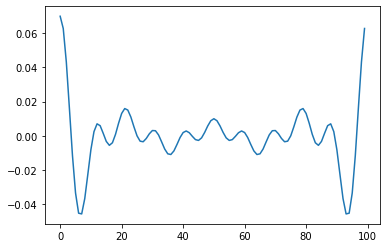

In [11]:
plt.plot(np.fft.ifft([0, 0, 0, 0, 1, 1,1,1,1,1,1, 0 ,0 ,0, 0, 0, 0], 100))

In [ ]:
Audio(sound, rate=sample_rate, autoplay=False, normalize=True)

In [ ]:
Audio([sound1, sound2], rate=guitar_sample_rate, autoplay=True, normalize=True)

In [ ]:
Sxx, drawing_params = create_spectrogram(sound1, sample_rate, "angle")
Sxx2, drawing_params = create_spectrogram(sound1, sample_rate, "magnitude")

fig, Sxx = create_spectrogram_figure(Sxx, drawing_params, title="Phase", colorscale="HSV")


In [ ]:
%matplotlib widget

plt.imshow(np.real(phase))

In [ ]:
for i in range(10, 33, 3):
    f = create_spectrogram(sound1, sample_rate, "complex")[0][i]
    x = np.real(f)
    y = np.imag(f)
    colors = plt.cm.rainbow(np.linspace(0, 1, len(y)))

    cs = [colors[i * len(x)//len(x)] for i in range(len(x))]
    plt.scatter(x, y, color=cs)
    plt.show()

In [2]:
from imports import *
import io
from scipy.io import wavfile

import base64

def sound_to_html(sound, sample_rate): 
    sound = np.array(sound).transpose()
    print(np.max(np.abs(sound)), np.mean(np.abs(sound)))
    if np.max(np.abs(sound)) > 1:
        print("sound has too big value")
        sound /= np.max(np.abs(sound))
        
    stream = io.BytesIO()
    wavfile.write(stream, sample_rate, (sound * 32766).astype(np.int16))

    return "data:audio/wav;base64," + base64.b64encode(stream.read()).decode("ascii")


import pandas as pd
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from jupyter_dash import JupyterDash
import dash_core_components as dcc
import dash_html_components as html
from dash.dependencies import Input, Output
import dash_bootstrap_components as dbc

# code and plot setup
# settings
pd.options.plotting.backend = "plotly"

def create_dash_app(data, sound, sample_rate, mmethods):
#     sound1, sound2, mask = mmethods[0][0](sound, sample_rate)
    sound1 = sound2 = sound
    data = create_figures(sound, sound, sound, sample_rate) + data
    
    figs = [i[0] for i in data]
    graphs = []
    for i, fig in enumerate(figs):
        graphs.append(dcc.Graph(id='graph' + str(i), figure=fig))
        
    layouts = [
        html.Div(["Current method: ",
                     html.Div(["0"], id="current_method")
                 ]),
        dcc.Checklist(
            id="checklist_options",
            options=[
                {'label': 'norm values per row', 'value': 'need_norm_per_row_values'},
                {'label': 'log scale values', 'value': 'need_log_scale_values'},
                {'label': 'log scale freqs', 'value': 'need_log_scale_frequency'},
                {'label': 'filter low values', 'value': 'need_filter_low_values'}
            ],
            value=['need_norm_per_row_values', 'need_log_scale_values']
        ) ,
        html.Div([
            "log scale coef:",
            dcc.Slider(
                id='log_scale_coeff',
                min=50,
                max=1000,
                step=0.5,
                value=100
            ),
        ], style={'width': '300px', 'display': 'inline-block'}),
        html.Div(graphs),
        html.Div([
            html.H4("Original sound: "), 
              html.Audio([
                html.Source(src=sound_to_html(sound, sample_rate))
            ], controls="controls")
        ]),
        html.Div([html.H2("Methods testing")]), 
    ]
    
    
    methods = [{"id" : "method" + str(i), "callable_method" : callable_method, 
                "create_layout": create_layout, "create_callback_inputs" : create_callback_inputs} \
                for (i, (callable_method, create_layout, create_callback_inputs)) in enumerate(mmethods)]
    for method in methods:
        id = method["id"]
        layouts.append(html.Div([
            html.H2(id),
            html.Div(method["create_layout"](id)),
            html.H4("Stereo: "),
            html.Div(
                ["loading..."],
                id="stereo_audio" + id
            ),
            html.Div(["loading"], id="layout_addition" + id),
            html.Div("0", id='last_time_used' + id, style={'display': 'none'})
        ]))
    
    app = JupyterDash(__name__)
    app.layout = html.Div(layouts)
    
    cur_time = 0
    for i, method in enumerate(methods):
        @app.callback([Output('stereo_audio' + method["id"], 'children'),
                       Output('layout_addition' + method["id"], 'children'),
                       Output('last_time_used' + method["id"], "children")],
                       method["create_callback_inputs"](method["id"]))
        def run_method(*args):
            nonlocal cur_time, sound1, sound2
            sound1, sound2, layout_addition = method["callable_method"](sound, sample_rate, *args)
            cur_time += 1
            return html.Audio([html.Source(src=sound_to_html((sound1, sound2), sample_rate))],  \
                                  controls="controls", id=str(cur_time)), \
                              layout_addition, \
                              str(cur_time)
    
    last_called_method = 0
    need_recreate_figs = False
    
    @app.callback([Output('current_method', 'children')],
                 [Input('last_time_used'+  method["id"], 'children') for method in methods])
    def sync_methods(*times):
        nonlocal last_called_method, last_called_method, need_recreate_figs
        for i, time in enumerate(times):
            if cur_time == int(time):
                need_recreate_figs = True
                last_called_method = i
                return [str(last_called_method)]
                  
        raise Exception("wtf " + str(cur_time) + ": " + str(times))
    
    @app.callback(
        [Output('graph' + str(i), 'figure') for i in range(len(figs))] ,
        [Input('current_method', 'children'),
         Input('checklist_options', "value"),
         Input('log_scale_coeff', "value")]
    )
    def streamFig(_, checklist_options, log_scale_coeff):
        nonlocal need_recreate_figs, data
        if need_recreate_figs:
            ddata = create_figures(sound, sound1, sound2, sample_rate)
            data[:len(ddata)] = ddata
            figs[:len(ddata)] = [i[0] for i in data[:len(ddata)]]
            need_recreate_figs = False
            
        
        for (fig, Sxx, apply_params_func) in data:
            apply_params_func(checklist_options, log_scale_coeff)

        return figs

    app.run_server(mode='external', port=8092, dev_tools_ui=True, #debug=True,
                  dev_tools_hot_reload=True, threaded=True)

    
def create_figures(sound, sound1, sound2, sample_rate):
    fig1 = create_magnitude_figure(sound1, sample_rate)
    fig2 = create_magnitude_figure(sound2, sample_rate)
    return [fig1, fig2]
    


# mm = create_spectrogram_figure(mask, {"t": t, "freqs" : f}, "mask") + (lambda a, b: b,)
# fig2 = create_phase_figure(sound1, sample_rate)
fig = create_magnitude_figure2(sound1, sound2, sample_rate)
fig1 = create_magnitude_figure(sound1, sample_rate)
fig2 = create_magnitude_figure(sound2, sample_rate)
create_dash_app([fig, fig1, fig2], sound, sample_rate, [create_dashed_method_with_mask()])

0.66423666 0.07334227
Dash app running on http://127.0.0.1:8092/
0.7518289605536292 0.07365847807068313


D:\data\progr\audio_widener\pycharm_proj\render_audio.py:31: RuntimeWarning:

invalid value encountered in log10



In [ ]:



def test_mask(func):
    global mask, t, Zxx, f
    nperseg = 1024
    noverlap = 512

    f, t, Zxx = signal.stft(sound, sample_rate, nperseg=nperseg, noverlap=noverlap)

    mask = func(Zxx)


    # mask[:,0]
    # mask[0, :]

    plt.imshow(mask)


In [ ]:
mask_generator = split_into_bands_by_parts(is_dynamic=True)
test_mask(mask_generator)
sound1, sound2 = m2s_freq_split(sound, sample_rate, mask_generator)
audio_mono_stereo(sound, sound1, sound2, sample_rate)

In [ ]:
mask_generator = split_into_bands_log(is_dynamic=False)
test_mask(mask_generator)
sound1, sound2 = m2s_freq_split(sound, sample_rate, 10, mask_generator )
audio_mono_stereo(sound, sound1, sound2, sample_rate)

In [ ]:
plt.imshow(weights)

In [ ]:

# weights = np.array([[0, 0, 1, 0, 0],
#                     [0, 2, 4, 2, 0],
#                     [1, 4, 8, 4, 1],
#                     [0, 2, 4, 2, 0],
#                     [0, 0, 1, 0, 0]],
#                    dtype=np.float)
# weights = weights / np.sum(weights[:])



In [ ]:
ndfilters.convolve(mask, weights, mode='constant').shape

In [ ]:
sound1, sound2 = m2s_freq_split(sound, sample_rate, 10, split_into_bands_static)
audio_mono_stereo(sound, sound1, sound2, sample_rate)

In [ ]:
(Zxx * mask).shape

In [ ]:
Zxx.shape

In [ ]:
mask.shape

In [ ]:
np.max(create_spectrogram(guitar_wd1, sample_rate, "phase")[0])

In [ ]:
np.max(plt.specgram(guitar_wd1, mode="phase")[0])

In [ ]:
plot_spectrogram(Sxx, NFFT, noverlap, Fs, freqs, t)

In [ ]:
Zxx.shape

In [ ]:
len(f)

In [ ]:
from scipy.ndimage.filters import gaussian_filter, fourier_uniform


In [ ]:
sound1, sound2 = m2s_freq_split(sound, sample_rate, 10, split_into_bands_static)
audio_mono_stereo(sound, sound1, sound2, sample_rate)

In [ ]:
from imports import *

In [ ]:
song = guitar_sample

nperseg = 1024
noverlap = 512

f, t, Zxx = signal.stft(song, sample_rate, nperseg=nperseg, noverlap=noverlap)
# mask = split_into_bands(Zxx, 50)

mask = np.zeros_like(Zxx, dtype="float")
cnt = 0
g = 0
for i in range(len(mask)):
    if cnt == 25:
        cnt = 0
        g += 1
        
    mask[i, :] = g     
    cnt += 1

borders = []
last = 0
lastpos = -1

for i in range(len(mask)):
    if mask[i][0] != last:
        borders.append((lastpos + 1, i))
        last = mask[i][0]
        lastpos = i

mask1 = np.ones_like(mask)

for (left, right) in borders:
    mid = (left + right) // 2
    val = 0
    for j in range(left, mid + 1):
        mask1[j] *= val
#         print(val)
        val += 1 / (mid + 1 - left)

    for j in range(mid + 1, right  + 1):
        mask1[j] *= val
#         print(val)
        val -= 1 / (right - mid)
        
#     break
        
mask2 = np.ones_like(mask1) - mask1
    
# mask1 = mask % 2 == 0
# mask2 = mask % 2 == 1

# Zxx1[mask1] = 0
# Zxx2[mask2] = 0
#     #     for i in range(Zxx.shape[0]):

#     #         if i % 15 < 9:
#     #             Zxx1[i,:] = 0
#     #         else:
#     #             Zxx2[i,:] = 0
# _, sound1 = signal.istft(Zxx1, sample_rate, nperseg=nperseg, noverlap=noverlap)
# _, sound2 = signal.istft(Zxx2, sample_rate, nperseg=nperseg, noverlap=noverlap)

# return sound1, sound2

Zxx1 = Zxx * mask1
Zxx2 = Zxx * mask2

_, sound1 = signal.istft(Zxx1, sample_rate, nperseg=nperseg, noverlap=noverlap)
_, sound2 = signal.istft(Zxx2, sample_rate, nperseg=nperseg, noverlap=noverlap)


print("stereo:")
display(Audio([sound1, sound2], rate=guitar_sample_rate, autoplay=True, normalize=True))
print("mono:")
display(Audio(song, rate=sample_rate, autoplay=False, normalize=True))

In [ ]:
plt.imshow(mask1)

In [ ]:
plt.imshow(mask2)

In [ ]:
np.sum(np.abs(guitar_sample - sound1[:len(guitar_sample)]))

In [ ]:
len(borders)

In [ ]:

def plot_spec_image(Sxx, extent, vmin, vmax, log_scale=False):
    cmap = plt.cm.get_cmap("bwr")
    plt.imshow(Sxx, extent=extent, cmap=cmap, origin="upper", vmin=vmin, vmax=vmax)
    plt.gca().axis('auto')
    if log_scale:
        plt.yscale("log", base=10)
    plt.gca().invert_yaxis()
    plt.gca().minorticks_off()
    ticks = [100, 1000, 2000, 5000, 10000]
    plt.yticks(ticks, map(str, ticks))
    plt.ylim(50, 11000)
    
    
    
    
def plot_spectrogram(Sxx, NFFT, noverlap, Fs, freqs, t):
    %matplotlib widget
    Sxx = np.flipud(Sxx)
    max_per_row = np.max(np.abs(Sxx), axis=-1)[:, None]
    Sxx = np.divide(Sxx, max_per_row, out=np.zeros_like(Sxx), where=max_per_row!=0)
    Sxx /= np.max(Sxx)
    
    vmax = max(np.max(Sxx), np.min(Sxx))
    vmin = -vmax
    
    pad_xextent = (NFFT-noverlap) / Fs / 2
    xmin, xmax = np.min(t) - pad_xextent, np.max(t) + pad_xextent
    extent = xmin, xmax, freqs[0], freqs[-1]
    
    if vmin == vmax:
        vmin, vmax = -1, 1
    
    plot_spec_image(Sxx, extent, vmin, vmax)
    red_patch = mpatches.Patch(color='red', label='Left')
    blue_patch = mpatches.Patch(color='blue', label='Right')
    plt.legend(handles=[red_patch, blue_patch])
    

    
def visualize_stereo(sound1, sound2, sample_rate, cut=1):
    %matplotlib widget
    if cut:
        sound1 = sound1[:sample_rate * cut]
        sound2 = sound2[:sample_rate * cut]
    spec1, drawing_params = create_spectrogram(sound1, sample_rate)
    spec2, drawing_params = create_spectrogram(sound2, sample_rate)
    spec1 = np.log10(spec1 * 100 +1)
    spec2 = np.log10(spec2 * 100 + 1)
#     print(np.max(spec1 - spec2))
#     print(np.max(spec1))
    plot_spectrogram(spec1 - spec2, **drawing_params)
    
def vizualize_phase(sound1, sound2, sample_rate, cut=1):
    %matplotlib widget
    if cut:
        sound1 = sound1[:sample_rate * cut]
        sound2 = sound2[:sample_rate * cut]
    spec1, drawing_params = create_spectrogram(sound1, sample_rate)
    spec2, drawing_params = create_spectrogram(sound2, sample_rate)
    plot_spectrogram(spec1, **drawing_params)
    plot_spectrogram(spec2, **drawing_params)
#     plot_spectrogram(np.abs(spec1-spec2), **drawing_params) 
    
    
# умножить разность в фазе на амплитуду, чтобы занулить бесполезные частоты
visualize_stereo(sound1, sound2, jazz_sample_rate, cut=3)